<a href="https://colab.research.google.com/github/Shaunak-Mukherjee/ECE-58000-Optimization-Methods-for-Systems-And-Control/blob/Optimization-Algorithms/Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting point, x0 = [0.55 0.7 ]
Iteration 1: alpha = 0.08336, x_iter = [-0.06572546  0.06535223], f(x_iter) = 3.07983
Iteration 2: alpha = 3.21703, x_iter = [ 0.6574037  -0.64336879], f(x_iter) = -0.51331
Iteration 3: alpha = 0.08333, x_iter = [ 0.65046662 -0.65046579], f(x_iter) = -0.51390
Starting point, x0 = [-0.9 -0.5]
Iteration 1: alpha = 0.08567, x_iter = [-0.27836427  0.31765317], f(x_iter) = 2.66113
Iteration 2: alpha = 0.15384, x_iter = [-0.58065249  0.54741007], f(x_iter) = 1.93312
Iteration 3: alpha = 0.08254, x_iter = [-0.56637032  0.56605429], f(x_iter) = 1.92978
Iteration 4: alpha = 0.05370, x_iter = [-0.56550206  0.56538968], f(x_iter) = 1.92977


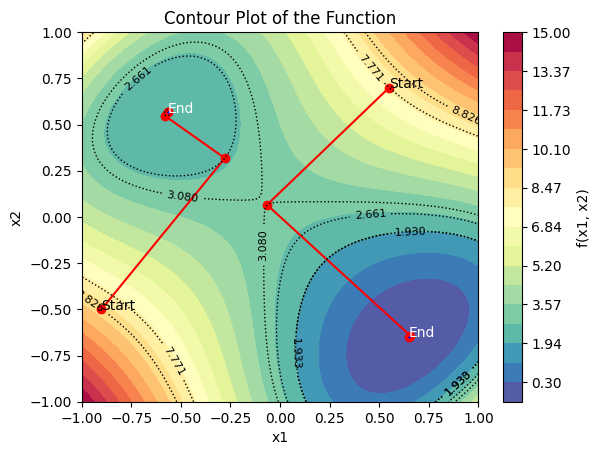

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x1, x2):
    return (x2 - x1) ** 4 + 12 * x1 * x2 - x1 + x2 + 3

# Define the gradient of the function
def grad(x1, x2):
    df_dx1 = -4 * (x2 - x1) ** 3 + 12 * x2 - 1
    df_dx2 = 4 * (x2 - x1) ** 3 + 12 * x1 + 1
    return np.array([df_dx1, df_dx2])

# Define objective function for line search
def phi(alpha, x_iter):
    x1, x2 = x_iter
    return f(x1 - alpha * (12 * x2 + 4 * (x1 - x2) ** 3 - 1), x2 - alpha * (12 * x1 - 4 * (x1 - x2) ** 3 + 1))

# Golden section search for finding optimal alpha
def golden_section_search(phi, x_iter, a=0, b=5, rho=(3 - np.sqrt(5)) / 2, uncertainty=1e-4):
    a1 = a + rho * (b - a)
    b1 = a + (1 - rho) * (b - a)
    phi_a1 = phi(a1, x_iter)
    phi_b1 = phi(b1, x_iter)

    while np.linalg.norm(b - a) > uncertainty:
        if phi_a1 < phi_b1:
            b = b1
            b1 = a1
            phi_b1 = phi_a1
            a1 = a + rho * (b - a)
            phi_a1 = phi(a1, x_iter)
        else:
            a = a1
            a1 = b1
            phi_a1 = phi_b1
            b1 = a + (1 - rho) * (b - a)
            phi_b1 = phi(b1, x_iter)

    return (a1 + b1) / 2

# Plot function contours and path of optimization
def plot_contours_and_path(x1_range, x2_range, f, x_iters, f_values, f_level_set):
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
    f_grid = f(x1_grid, x2_grid)

    plt.figure()
    # Define level sets
    levels = np.linspace(f_values.min(), f_values.max(), 20)
    plt.contourf(x1_grid, x2_grid, f_grid, levels=levels, cmap='Spectral_r')
    plt.colorbar(label='f(x1, x2)')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Contour Plot of the Function')

    for x_iter in x_iters:
        plt.plot([x[0] for x in x_iter], [x[1] for x in x_iter], 'ro-')
        plt.text(x_iter[0][0], x_iter[0][1], 'Start', color='Black')
        plt.text(x_iter[-1][0], x_iter[-1][1], 'End', color='white')
        plt.plot(x_iter[-1][0], x_iter[-1][1], 'bx', markersize=1)

    level_set_levels = sorted(list(set(f_level_set)))
    cont = plt.contour(x1_grid, x2_grid, f_grid, levels=level_set_levels, colors='black', linestyles='dotted', linewidths=1)
    plt.clabel(cont, inline=True, fontsize=8)
    plt.show()

# Steepest descent algorithm implementation
def steepest_descent(f, grad, x_init, tol=1e-2, uncertainty=1e-4):
    x_iter = np.array(x_init, dtype=float)
    x_iters = [x_iter.copy()]
    f_level_set = []
    k_iter = 1

    while np.linalg.norm(grad(*x_iter)) > tol:
        f_level_set.append(f(*x_iter))

        alpha = golden_section_search(phi, x_iter, uncertainty=uncertainty)
        grad_vals = grad(*x_iter)
        x_new = x_iter - alpha * grad_vals

        x_iters.append(x_new.copy())
        print(f'Iteration {k_iter}: alpha = {alpha:.5f}, x_iter = {x_new}, f(x_iter) = {f(*x_new):.5f}')

        x_iter = x_new
        k_iter += 1

    return x_iters, f_level_set

# Main function to run the steepest descent algorithm
def main():
    # Define the range of x1 and x2
    x1_range = np.linspace(-1, 1, 100)
    x2_range = np.linspace(-1, 1, 100)

    # Initial guesses
    x_inits = [np.array([0.55, 0.7]), np.array([-0.9, -0.5])]

    x_iters_all = []
    f_level_set_all = []

    for x_init in x_inits:
        print(f'Starting point, x0 = {x_init}')
        x_iters, f_level_set = steepest_descent(f, grad, x_init)
        x_iters_all.append(x_iters)
        f_level_set_all.extend(f_level_set)

    # Compute function values for the contour plot
    f_values = f(*np.meshgrid(x1_range, x2_range))

    # Plot contours and optimization path
    plot_contours_and_path(x1_range, x2_range, f, x_iters_all, f_values, f_level_set_all)

if __name__ == '__main__':
    main()
